# Laboratorio 2



In [1]:
import cv2
import numpy as np 
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline

from PIL import Image, ImageOps

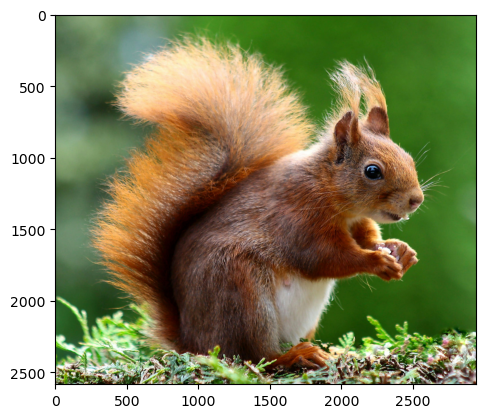

In [2]:
# Se carga la imagen y se convierte a formato RGB
img = cv2.imread("ardilla.jpg")
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(img)

## Problema # 1

Desarrolle   una   funcion   que   permita   hacer   la   binarizacion   de   una   imagen,   para   realizarlo   puede utilizar  el  enfoque  que  preﬁera.

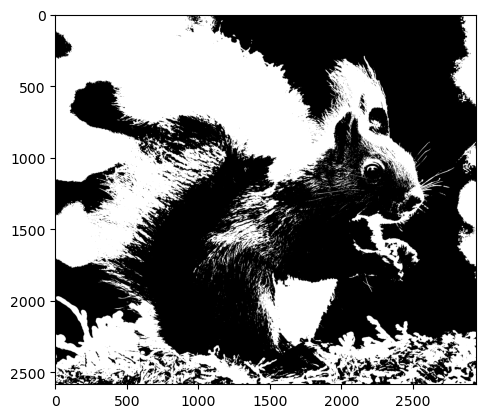

In [3]:
def binarize(img, threshold = 100):

    # Se convierte la imagen a escala de grises
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

    # Se hace tresholding utilizando numpy
    img_bin = (gray > threshold) * 100

    return img_bin

# Se prueba la función creada
img_bin = binarize(img, threshold = 100)
plt.imshow(img_bin, cmap = "gray")

## Problema 2

Desarrolle una función que dada dos que usted desee del mismo tamaño (igual ancho y alto) y a color, realice las operaciones SUMA, RESTA, AND, OR , XOR con ambas imágenes recuerde que para realizar las operaciones lógicas es necesario pasar la imagen a escala de grises y luego binarizarla.

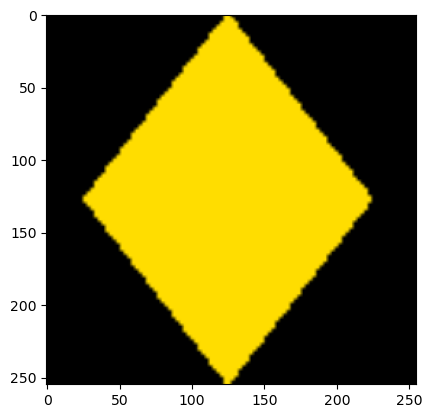

In [5]:
#Carga de la primera imagen
img1 = cv2.imread('rombo.webp')
img1= cv2.resize(img1,(255,255)) #Regula el ancho y alto
plt.imshow(cv2.cvtColor(img1, cv2.COLOR_BGR2RGB))

Esta imagen es de tipo:  uint8 con dimensiones: (255, 255)


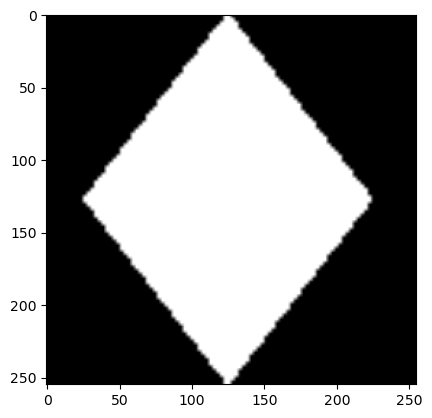

In [6]:
img_gray =cv2.cvtColor(img1,cv2.COLOR_BGR2GRAY) # Convierte la imagen a escala de grises

im_type = img_gray.dtype
shape = img_gray.shape

print('Esta imagen es de tipo: ', img_gray.dtype, 'con dimensiones:', img_gray.shape)
plt.imshow(img_gray, cmap='gray')

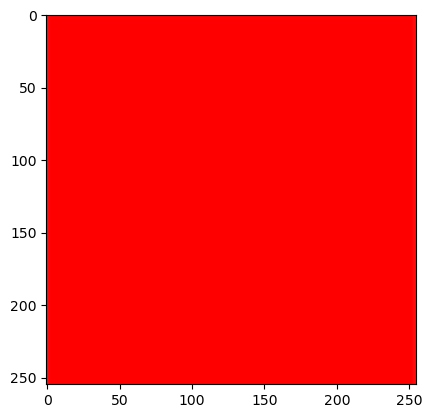

In [9]:
img2 = cv2.imread('rectangulo.webp')
img2= cv2.resize(img2,(255,255)) #Regula el ancho y alto
plt.imshow(cv2.cvtColor(img2, cv2.COLOR_BGR2RGB))

Esta imagen es de tipo:  uint8 con dimensiones: (255, 255)


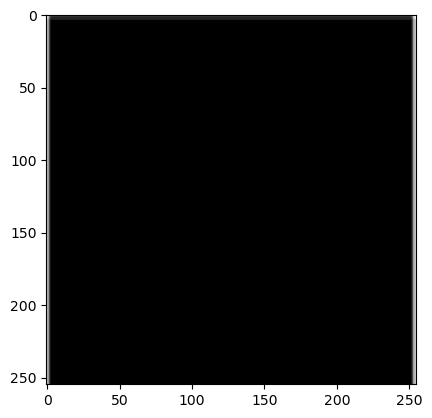

In [10]:
img_gray2 =cv2.cvtColor(img2,cv2.COLOR_BGR2GRAY) # Convierte la imagen a escala de grises

im_type = img_gray2.dtype
shape = img_gray2.shape

print('Esta imagen es de tipo: ', img_gray2.dtype, 'con dimensiones:', img_gray2.shape)
plt.imshow(img_gray2, cmap='gray')


OPERACIONES BÁSICAS

SUMA

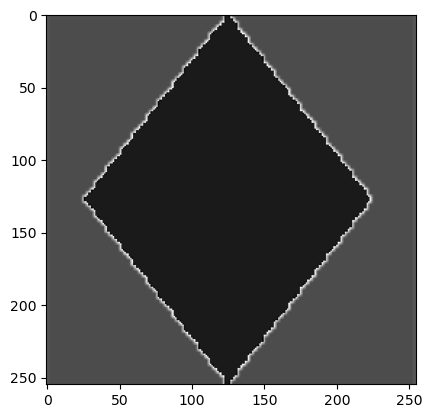

In [11]:
suma = img_gray+img_gray2
plt.imshow(suma, 'gray')

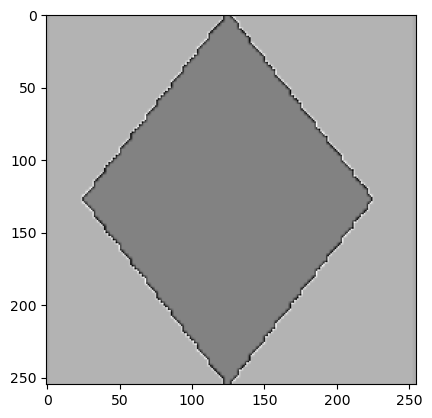

In [12]:
resta = img_gray-img_gray2
plt.imshow(resta, 'gray')

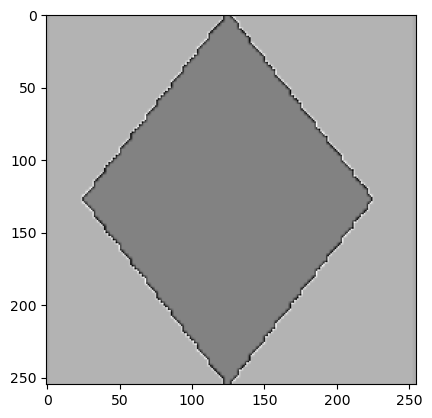

In [13]:
resultado_and = img_gray-img_gray2
plt.imshow(resultado_and, 'gray')

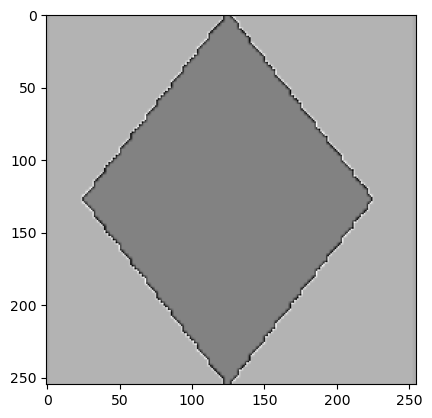

In [30]:
resultado_or = img_gray-img_gray2
plt.imshow(resultado_or, 'gray')

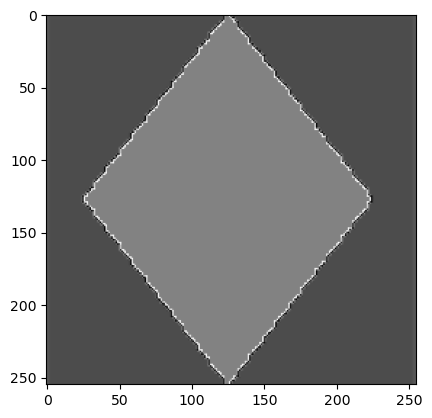

In [18]:
img_xor = cv2.bitwise_xor(img_gray, img_gray2)
plt.imshow(img_xor, cmap='gray')

## Problema 3

Desarrolle una función que dada una imagen en escala de grises muestre dicha imagen en 3 dimensiones, donde los ejes X e Y representan el dominio espacial de la imagen y Z representa la intensidad del color gris de cada pixel.


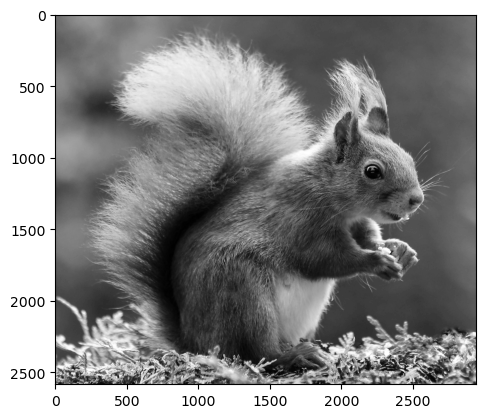

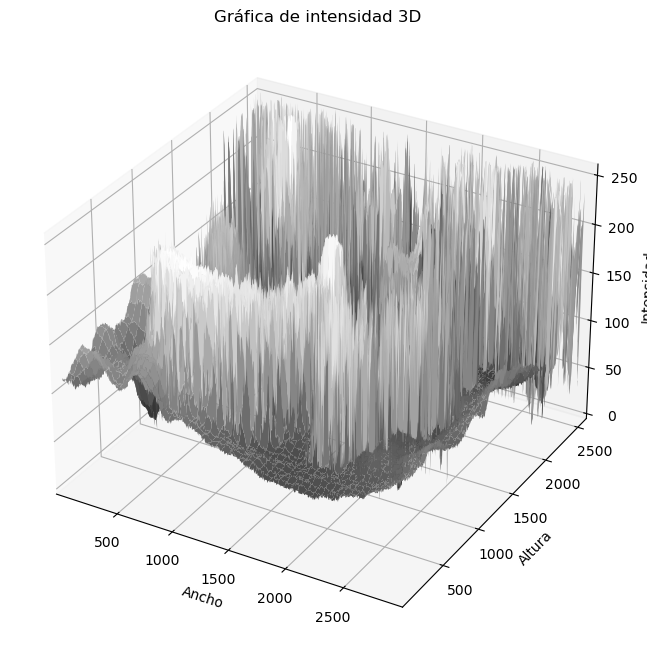

In [24]:
def plot_img3D(input_image, elev=None, azim=None):
    height = input_image.shape[0]
    width = input_image.shape[1]
    x = np.linspace(0, width, width)
    y = np.linspace(0, height, height)   
    xv, yv = np.meshgrid(x,y)
   
    fig = plt.figure(figsize=[10,8])
    ax = fig.add_subplot(111, projection='3d')
    ax.plot_surface(xv, yv, input_image, cmap='gray', linewidth=0)

    ax.view_init(elev,azim)
    ax.set_title("Gráfica de intensidad 3D")
    ax.set_xlabel('Ancho')
    ax.set_ylabel('Altura')
    ax.set_zlabel('Intensidad')
    ax.set_xlim([1,width])
    ax.set_ylim([1,height])
    ax.set_zlim([0,256])
    plt.show()

src_image = cv2.imread("ardilla.jpg", cv2.IMREAD_COLOR)
src_image = cv2.cvtColor(src_image , cv2.COLOR_BGR2GRAY)
plt.imshow(src_image, cmap='gray')
plt.show()

plot_intensity(src_image)

## Problema 4

Implemente   una   función   para   cada   una   de   las   transformaciones   vistas   en   clase:   negativa,   lineal, logarítmica  y  exponencial.

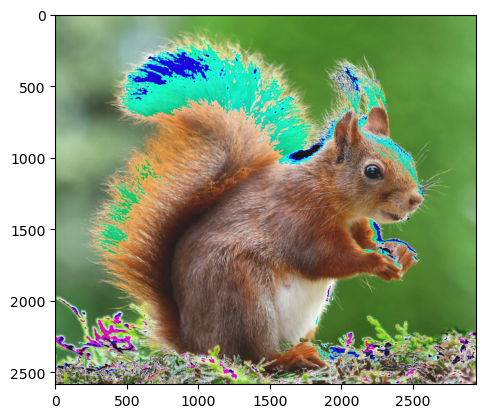

In [22]:
from scipy.interpolate import interp1d

def image_transforms(img, transform, alpha = 1, beta = 30, gamma = 0.05):

    # Se realiza la transformación deseada
    if transform == "Lin":
        img_out = alpha * img + beta

    elif transform == "Neg":
        img_out = 255 - img

    elif transform == "Log":
        # Se obtiene el valor de la constante de escalamiento "c"
        c = 255 / np.log(1 + np.max(img))

        # Se aplica la transformación
        img_out = c * np.log(1 + img)

    elif transform == "Exp":
        # Se aplica la transformación logarítmica
        img_out = alpha * (img ** gamma)

        # Se normalizan los valores entre 0 y 255
        # 1. Se resta el valor mínimo para que el valor más pequeño sea 0
        # 2. Se divide dentro del rango de valores (maximo - mínimo) para escalar los valores entre 0 y 1
        # 3. Se multiplica por 255 para escalar los valores entre 0 y 255
        img_out = ((img_out - np.min(img_out)) / (np.max(img_out) - np.min(img_out))) * 255

    # Se convierten los valores obtenidos en int
    return img_out.astype(int)

# Se prueba la función creada
img_transf = image_transforms(img, transform = "Lin")
plt.imshow(img_transf)

## Problema 5

Investigue  que  hace  el  kernel  Laplaceano  y  como  este  enfoque  se  diferencia  de  usar  el  algoritmo  de Canny  para  la  deteccion  de  bordes.

* En 1986, Canny propuso un método para la detección de bordes, el cual se basaba en tres
criterios, estos son:
* Un criterio de detección expresa el hecho de evitar la eliminación de bordes
importantes y no suministrar falsos bordes.
* El criterio de localización establece que la distancia entre la posición real y la localizada
del borde se debe minimizar.
* El criterio de una respuesta que integre las respuestas múltiples correspondientes a un
único borde. 

El algoritmo de Canny cumple estos criterios a través de una serie de pasos específicos:

Suavizado:

La imagen se suaviza usando un filtro Gaussiano para reducir el ruido y los detalles finos que podrían generar falsos bordes.
Cálculo del gradiente:

Se calculan las derivadas de la imagen en las direcciones 
𝑥
x e 
𝑦
y para obtener la magnitud y la dirección del gradiente. Estos valores ayudan a identificar áreas con cambios bruscos en intensidad, que son indicativos de bordes.
Supresión no máxima:

Este paso asegura que el algoritmo sólo marque los máximos locales en la dirección del gradiente como posibles bordes. Esto ayuda a afinar los bordes y eliminar respuestas múltiples para un mismo borde.
Umbral con histéresis:

Se aplican dos umbrales: un umbral alto y un umbral bajo. Los píxeles con una magnitud de gradiente superior al umbral alto se consideran bordes definitivos. Los píxeles con magnitudes entre los dos umbrales se consideran bordes solo si están conectados a píxeles con una magnitud superior al umbral alto, garantizando así la continuidad de los bordes.